Redes Neuronales

Carga y preparación de los datos

In [1]:
import pandas as pd

In [2]:
file = 'C:/Documentos/CURSOS/Diplomatura en Data Science Aplicada/TPS entregados/TP4/ion.csv'
ion = pd.read_csv(file)

El conjunto de datos con el que vamos a trabajar corresponden a datos de la ionosfera. Es un conjunto de datos que contiene características obtenidas de señales de radar enfocadas en la capa de ionosfera de la atmósfera de la Tierra. La tarea es determinar si la señal muestra la presencia de algún objeto o simplemente aire vacío.

In [3]:
from IPython.display import display

# Muestra el dataframe
display(ion.head())

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
0,1,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,good
1,2,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,bad
2,3,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,good
3,4,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,bad
4,5,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,good


In [4]:
df = ion.copy()

# Reemplazamos los valores categóricos por numéricos.
df['Class'] = df['Class'].replace({'good': 0, 'bad': 1})

# Separamos manualmente el conjunto de datos en entrenamiento y validación.
df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)

C:\Users\Fer\AppData\Local\Temp\ipykernel_10128\731090478.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Class'] = df['Class'].replace({'good': 0, 'bad': 1})


In [5]:
# Tomamos el valor mínimo y máximo del conjunto de entrenamiento.
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)

# Normalizamos manualmente el conjunto de datos.
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)
df_train.dropna(axis=1, inplace=True) # Descartamos valores nulos.
df_valid.dropna(axis=1, inplace=True) # Descartamos valores nulos.

In [6]:
# Definimos el conjunto final de entrenamiento y validación.
X_train = df_train.drop('Class', axis=1)
X_valid = df_valid.drop('Class', axis=1)
y_train = df_train['Class']
y_valid = df_valid['Class']

In [10]:
df.describe()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
count,351.000000,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,176.000000,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,...,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480,0.358974
std,101.469207,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,...,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337,0.480384
min,1.000000,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,88.500000,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,...,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350,0.000000
50%,176.000000,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,...,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000,0.000000
75%,263.500000,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,...,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660,1.000000
max,351.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##TAREA 1

Definir **DOS** modelos incluyendo en la capa final, una función de activación 'sigmoidea' para que el modelo produzca probabilidades de clase.

La estructura de definición sera:

```
model = keras.Sequential([
    Input(shape=(...,)),
    Dense(..., activation='...'),
    ...
    Dense(..., activation='...'),
    Dense(..., activation='sigmoid')
])
```

Donde en los puntos suspensivos escribirán los valores correspondientes según el conjunto de entradas, la cantidad de neuronas en la capa Densa y la función de activación seleccionada así como la cantidad de capas Densas (capas ocultas del modelo).

Una vez seleccionado los parámetros deben justificar su elección en la celda a continuación.

In [17]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

# Modelo 1
model_1 = Sequential([
    Input(shape=(34,)),  # 34 características en el dataset
    Dense(16, activation='relu'),  # Primera capa oculta
    Dense(8, activation='relu'),   # Segunda capa oculta
    Dense(1, activation='sigmoid') # Capa de salida
])

# Modelo 2
model_2 = Sequential([
    Input(shape=(34,)),  # 34 características en el dataset
    Dense(32, activation='relu'),  # Primera capa oculta
    Dense(16, activation='relu'),  # Segunda capa oculta
    Dense(8, activation='relu'),   # Tercera capa oculta
    Dense(1, activation='sigmoid') # Capa de salida
])

JUSTIFICACIÓN DE LOS MODELOS: 

#Modelo 1: Es un modelo con estructura sencilla, posee 2 capas ocultas (de 16 y 8 neuronas). Como funciones de activación se usaron relu (para manejar problemas de gradiente desvanecido) en las capas ocultas y sigmoide (utilizada para clasificación binaria 0 y 1) en la capa de salida. 

#Modelo 2: Es un poco más complejo que el Modelo 1, al tener 3 capas ocultas (de 32, 16 y 8 neuronas), se obtiene más características antes de reducir la dimensionalidad.

## TAREA 2

Agregar una métrica de precisión y pérdida de entropía cruzada al modelo, con su método de compilación.

```
model.compile(
    optimizer='...',
    loss='...',
    metrics=['...'],
)
```
Para problemas de dos clases, se aconseja utilizar versiones 'binarias'.

Utilice alguno de los optimizadores estudiados: SGD, RMSprop, Adam, Adadelta, Adagrad... (justifique)

Para loss puede usar: binary_crossentropy, mean_squared_error... (justifique)

Entre las métricas puede usar: MeanSquaredError, AUC, Accuracy, binary_accuracy... (justifique)


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy, AUC

model_1.compile(
    optimizer=Adam(learning_rate=0.001),  # Optimizador Adam
    loss=BinaryCrossentropy(),           # Función de pérdida
    metrics=[BinaryAccuracy(), AUC()]    # Métricas
)

model_2.compile(
    optimizer=Adam(learning_rate=0.001),  
    loss=BinaryCrossentropy(),
    metrics=[BinaryAccuracy(), AUC()]
)


JUSTIFICACIÓN DE LOS PARÁMETROS DE COMPILACIÓN:

#Optimizador: Se utiliza Adam, que es más general y funciona bien en una amplia variedad de casos. Combina las ventajas de AdaGrad y RMSprop. Es muy bueno en problemas de clasificación

#Loss: Se utiliza BinaryCrossentropy, que es una función de pérdida específica para problemas de clasificación binaria.

#Metricas: Usaremos BinaryAccuracy que calcula el porcentaje de predicciones correctas, siendo una metrica sencilla para problemas binarios. También usaremos AUC, que representa el área bajo la curva de ROC, midiendo la capacidad del modelo para distinguir 2 clases (se busca un valor cercano a 1)


El modelo en este problema podría tardar bastantes épocas en completar el entrenamiento, por lo que incluiremos una devolución de llamada de detención anticipada para mayor comodidad.

In [19]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history_1 = model_1.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0, # ocultamos la salida porque tenemos muchas épocas.
)

history_2 = model_2.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0, # ocultamos la salida porque tenemos muchas épocas.
)


Observe history_df:

In [20]:
history_1_df = pd.DataFrame(history_1.history)
history_1_df.head(10)

,auc_4,binary_accuracy,loss,val_auc_4,val_binary_accuracy,val_loss
0,0.397192,0.398374,0.703263,0.532132,0.400000,0.696118
1,0.417089,0.414634,0.699817,0.550876,0.533333,0.690362
2,0.438425,0.430894,0.696514,0.583496,0.657143,0.684669
3,0.455616,0.536585,0.693417,0.602726,0.733333,0.679052
4,0.473664,0.585366,0.690372,0.625609,0.809524,0.673701
5,0.503185,0.626016,0.687425,0.635589,0.790476,0.668541
6,0.534281,0.630081,0.684687,0.655063,0.780952,0.663713
7,0.562192,0.626016,0.682078,0.690360,0.790476,0.659000
8,0.606027,0.626016,0.679603,0.705209,0.761905,0.654413
9,0.643493,0.609756,0.677285,0.737342,0.752381,0.650106


In [21]:
history_2_df = pd.DataFrame(history_2.history)
history_2_df.head(10)

,auc_5,binary_accuracy,loss,val_auc_5,val_binary_accuracy,val_loss
0,0.310308,0.406504,0.819439,0.408715,0.247619,0.856613
1,0.351164,0.406504,0.789669,0.461782,0.247619,0.818128
2,0.411884,0.406504,0.762365,0.562317,0.247619,0.786336
3,0.497740,0.406504,0.739406,0.682084,0.247619,0.763151
4,0.619247,0.406504,0.722889,0.772639,0.247619,0.750429
5,0.692877,0.406504,0.713628,0.794791,0.247619,0.745773
6,0.714829,0.406504,0.710258,0.796008,0.247619,0.744843
7,0.712089,0.406504,0.709674,0.789192,0.247619,0.744284
8,0.704178,0.406504,0.709364,0.760224,0.247619,0.743026
9,0.690548,0.406504,0.708866,0.759494,0.247619,0.741086


## TAREA 3

Modifique el siguiente fragmento de código para obervar en uno o más gráficos las métricas obtenidas.

```
# Comenzaremos a graficar desde la época 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Mejor validación de pérdida: {:0.4f}" +\
      "\nMejor validación de exactitud: {:0.4f}")\
      .format(history_df['val_loss'].min(),
              history_df['val_binary_accuracy'].max()))
```



Mejor validación de pérdida: 0.2052
Mejor validación de exactitud: 0.9048
Mejor validación de AUC: 0.9618


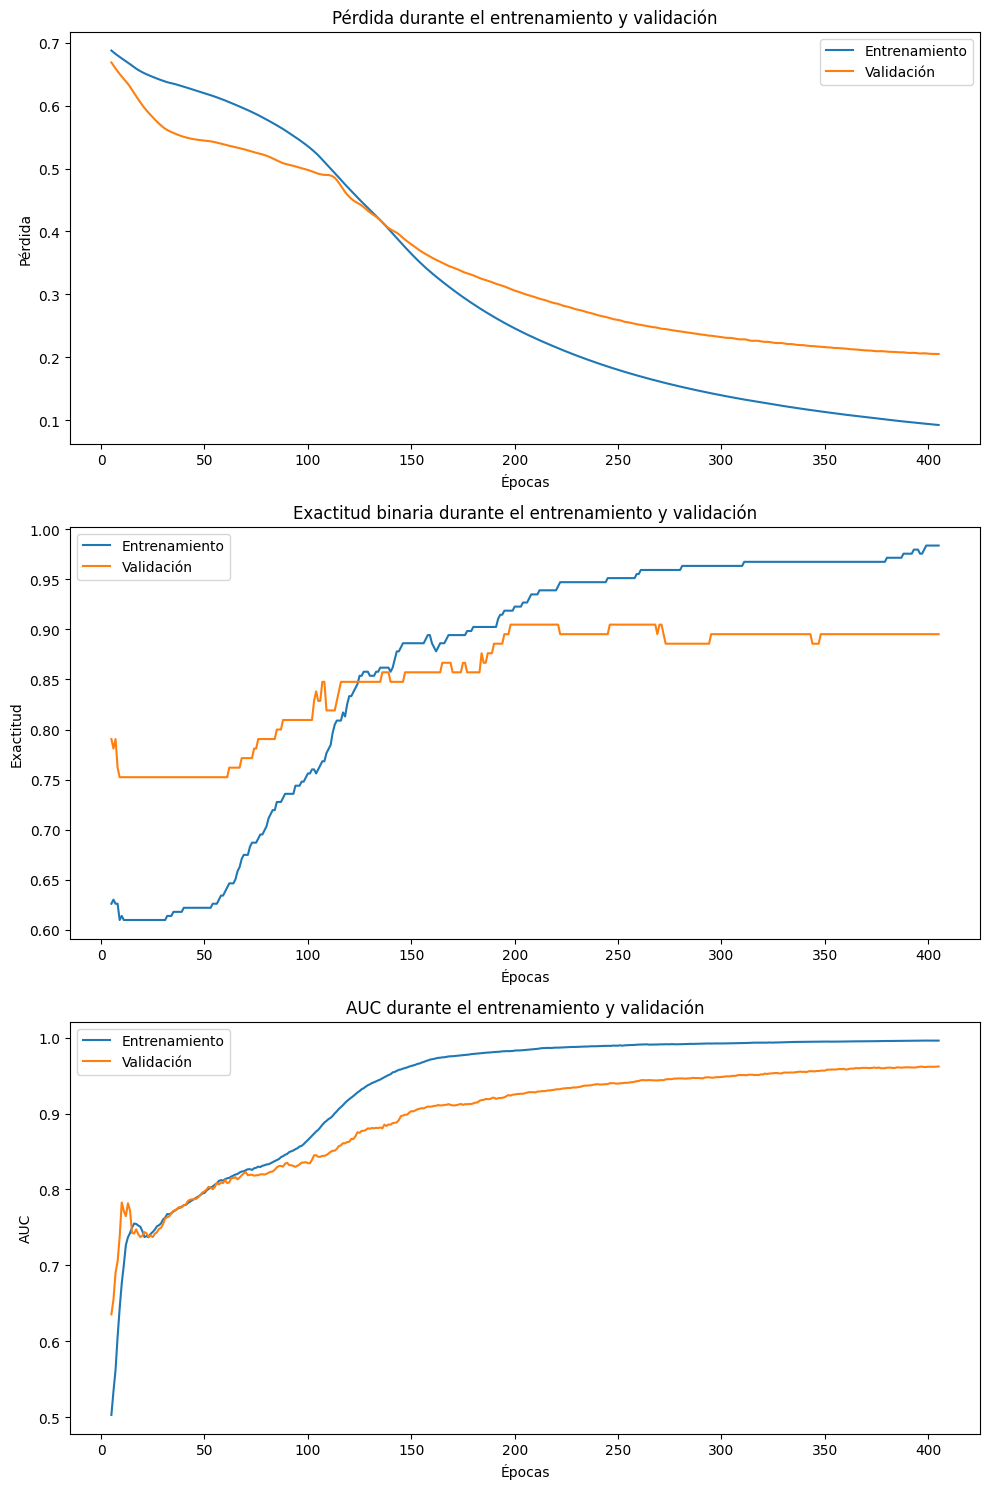

In [27]:
import matplotlib.pyplot as plt

# Comenzaremos a graficar desde la época 5
fig, axes = plt.subplots(3, 1, figsize=(10, 15))  # Tres gráficos apilados

# Gráfico de pérdida (loss)
history_1_df.loc[5:, ['loss', 'val_loss']].plot(ax=axes[0])
axes[0].set_title('Pérdida durante el entrenamiento y validación')
axes[0].set_xlabel('Épocas')
axes[0].set_ylabel('Pérdida')
axes[0].legend(['Entrenamiento', 'Validación'])

# Gráfico de exactitud binaria (binary_accuracy)
history_1_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot(ax=axes[1])
axes[1].set_title('Exactitud binaria durante el entrenamiento y validación')
axes[1].set_xlabel('Épocas')
axes[1].set_ylabel('Exactitud')
axes[1].legend(['Entrenamiento', 'Validación'])

# Gráfico de AUC
history_1_df.loc[5:, ['auc_4', 'val_auc_4']].plot(ax=axes[2])
axes[2].set_title('AUC durante el entrenamiento y validación')
axes[2].set_xlabel('Épocas')
axes[2].set_ylabel('AUC')
axes[2].legend(['Entrenamiento', 'Validación'])

# Ajustar diseño
plt.tight_layout()

# Imprimir los mejores valores de las métricas
print(("Mejor validación de pérdida: {:0.4f}" +\
       "\nMejor validación de exactitud: {:0.4f}" +\
       "\nMejor validación de AUC: {:0.4f}")\
      .format(history_1_df['val_loss'].min(),
              history_1_df['val_binary_accuracy'].max(),
              history_1_df['val_auc_4'].max()))


Mejor validación de pérdida: 0.1520
Mejor validación de exactitud: 0.9619
Mejor validación de AUC: 0.9895


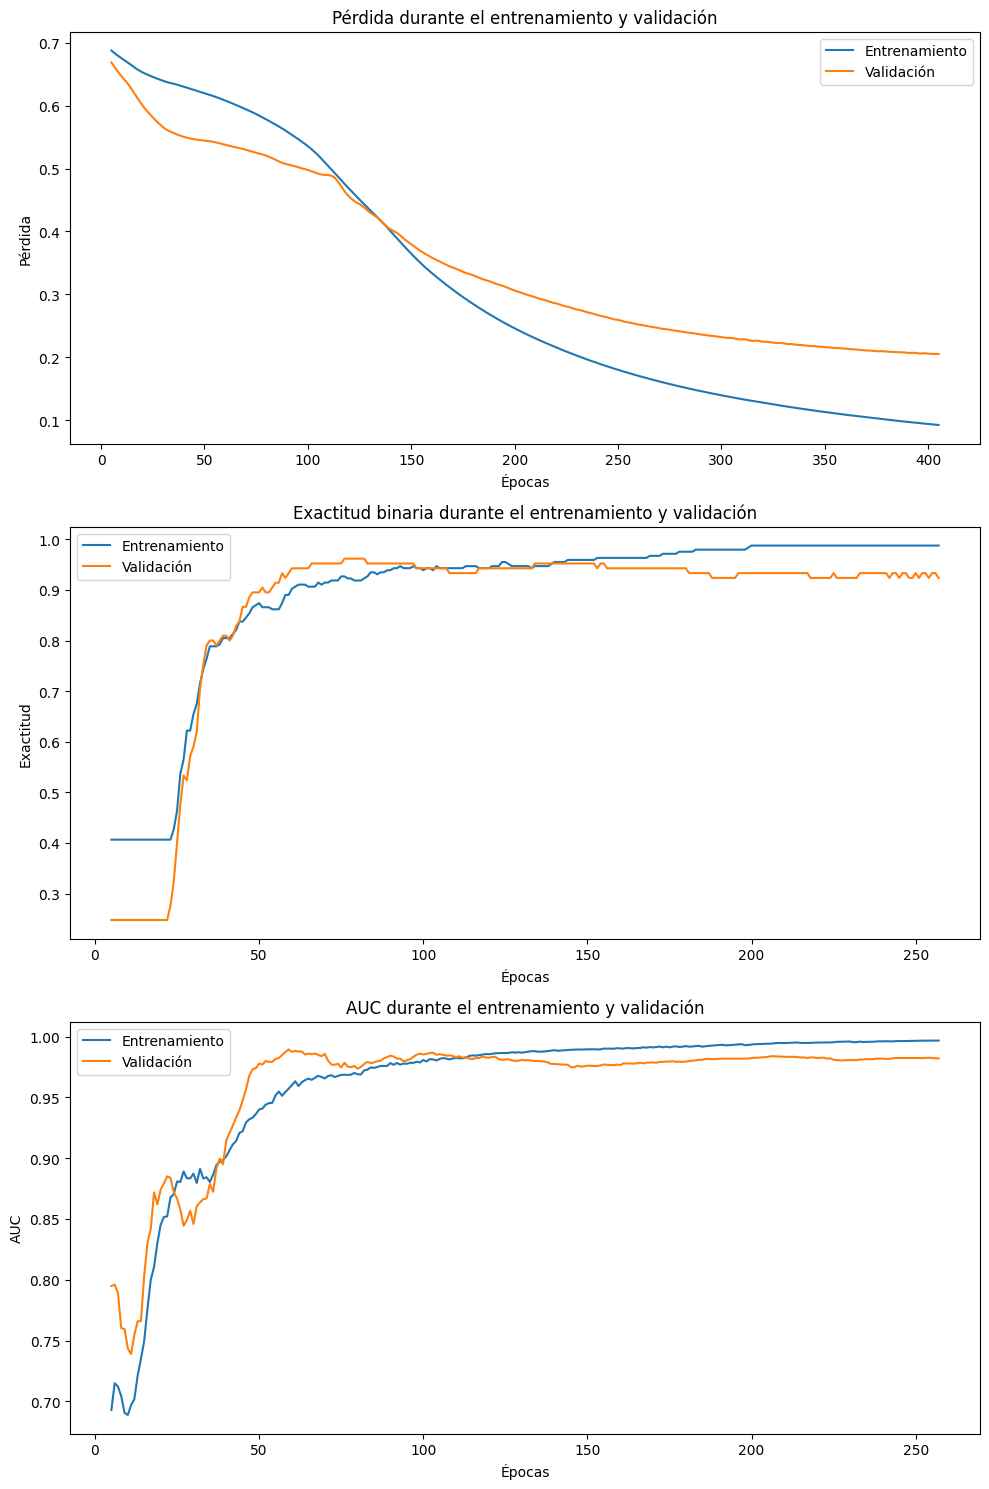

In [28]:
# Comenzaremos a graficar desde la época 5
fig, axes = plt.subplots(3, 1, figsize=(10, 15))  # Tres gráficos apilados

# Gráfico de pérdida (loss)
history_1_df.loc[5:, ['loss', 'val_loss']].plot(ax=axes[0])
axes[0].set_title('Pérdida durante el entrenamiento y validación')
axes[0].set_xlabel('Épocas')
axes[0].set_ylabel('Pérdida')
axes[0].legend(['Entrenamiento', 'Validación'])

# Gráfico de exactitud binaria (binary_accuracy)
history_2_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot(ax=axes[1])
axes[1].set_title('Exactitud binaria durante el entrenamiento y validación')
axes[1].set_xlabel('Épocas')
axes[1].set_ylabel('Exactitud')
axes[1].legend(['Entrenamiento', 'Validación'])

# Gráfico de AUC
history_2_df.loc[5:, ['auc_5', 'val_auc_5']].plot(ax=axes[2])
axes[2].set_title('AUC durante el entrenamiento y validación')
axes[2].set_xlabel('Épocas')
axes[2].set_ylabel('AUC')
axes[2].legend(['Entrenamiento', 'Validación'])

# Ajustar diseño
plt.tight_layout()

# Imprimir los mejores valores de las métricas
print(("Mejor validación de pérdida: {:0.4f}" +\
       "\nMejor validación de exactitud: {:0.4f}" +\
       "\nMejor validación de AUC: {:0.4f}")\
      .format(history_2_df['val_loss'].min(),
              history_2_df['val_binary_accuracy'].max(),
              history_2_df['val_auc_5'].max()))

## TAREA 4
Tome un valor al azar del conjunto de validación y realice una predicción con ambos modelos.

In [53]:
import numpy as np

# Seleccionar un índice aleatorio del conjunto de validación
random_index = np.random.randint(0, X_valid.shape[0])

# Mostrar el índice aleatorio seleccionado
print(f"Índice aleatorio seleccionado: {random_index}")

# Extraer la muestra y la etiqueta real usando iloc
sample = X_valid.iloc[random_index:random_index+1]  # Mantener formato 2D para el modelo
true_label = y_valid.iloc[random_index]

# Mostrar todos los valores de las características y la clase
print("\nCaracterísticas seleccionadas:")
print(X_valid.iloc[random_index])  # Muestra las 34 características
print(f"\nClase (etiqueta real): {true_label}")

# Realizar predicciones con ambos modelos
prediction_1 = model_1.predict(sample)
prediction_2 = model_2.predict(sample)

# Mostrar predicciones
print(f"\nPredicción con model_1: {prediction_1[0][0]:.4f} (probabilidad)")
print(f"Predicción con model_2: {prediction_2[0][0]:.4f} (probabilidad)")

# Interpretar las predicciones
predicted_class_1 = int(prediction_1[0][0] >= 0.5)
predicted_class_2 = int(prediction_2[0][0] >= 0.5)

print(f"\nClase predicha por model_1: {predicted_class_1}")
print(f"Clase predicha por model_2: {predicted_class_2}")


Índice aleatorio seleccionado: 12

Características seleccionadas:
Unnamed: 0    0.134670
V1            1.000000
V3            0.990830
V4            0.504370
V5            0.990515
V6            0.480910
V7            0.987825
V8            0.471505
V9            0.979735
V10           0.465145
V11           0.995020
V12           0.477465
V13           0.973565
V14           0.444490
V15           0.966845
V16           0.436050
V17           0.971085
V18           0.442085
V19           0.898410
V20           0.404000
V21           0.941370
V22           0.413065
V23           0.931285
V24           0.406305
V25           0.942435
V26           0.401555
V27           0.909065
V28           0.394320
V29           0.892730
V30           0.380680
V31           0.884555
V32           0.384525
V33           0.871615
V34           0.380490
Name: 48, dtype: float64

Clase (etiqueta real): 0.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step

Predicción con model